# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The aim of the project is to estimate the impact of a student's GPA and GRE scores, and the prestige of her undergraduate college on the probability of her admission into graduate school.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: The dataset has 400 observations consisting of student's GRE scores, GPAs and the level of prestige of their undergraduate school. The prestige is an interger between 1 and 4, with 1 indicating the most prestigious subset of schools and 4 indicating the least prestigious subset of schools. There were three observations with some missing data. These were  dropped from the analysis.

### Demo: Provide a table that explains the data by admission status

Variable   |       Description                            |Type of variable
-----------|----------------------------------------------|----------------
GPA        |      Student's GPA                           |Continuous
GRE        |      Student's GRE score                     |Continuous
prestige   |      Student's undergrad school rank         |Categorical
           |      1-highest; 4-Lowest                     |

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | 3.35 (0.38)  | 3.49(0.37)
GRE |573.6(116.1) | 618.6(109.3)
Prestige 1 | frequency (7.1%) | frequency (8.3%)
Prestige 2 | frequency (23.9%) | frequency (13.4%)
Prestige 3 |frequency (23.4%) | frequency (7.1%)
Prestige 4 |frequency (13.9%) | frequency (3.1%)

Note: The frequencies are stated as a percent of the total sample and sum to 100% across all four prestige ranks. One can convert them into percentage within each prestige score by dividing each percentage by the sum of the values in its row. 

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# Read in raw data and use crosstab
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna()
print(df.head())
# data.groupby(['col1', 'col2'])['col3'].mean()
print("Mean GPA by admit type")
print(df.groupby(['admit']).gpa.mean())
print("Std dev. of GPAs by admit type")
print(df.groupby(['admit']).gpa.std())
#
print("Mean GRE score by admit type")
print(df.groupby(['admit']).gre.mean())
print("Std dev. of GRE scores by admit type")
print(df.groupby(['admit']).gre.std())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
Mean GPA by admit type
admit
0    3.347159
1    3.489206
Name: gpa, dtype: float64
Std dev. of GPAs by admit type
admit
0    0.376355
1    0.371655
Name: gpa, dtype: float64
Mean GRE score by admit type
admit
0    573.579336
1    618.571429
Name: gre, dtype: float64
Std dev. of GRE scores by admit type
admit
0    116.052798
1    109.257233
Name: gre, dtype: float64


In [18]:
# For the prestige variable we first create dummies (based on project 3)
df.prestige = df.prestige.astype(int)
dummy_ranks = pd.get_dummies(df.prestige, prefix = 'prestige')
dummy_ranks.head()

C:\Users\vchop\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [24]:
# Create freuencies by admit status for prestige dummy variables
data = df[['admit', 'gre', 'gpa']].join(dummy_ranks.loc[:,])
data.head()
p1 = pd.crosstab(data.admit, data.prestige_1, normalize = 'all')
p1T = p1.T.drop(p1.T.index[0])
print(p1T)
#
p2 = pd.crosstab(data.admit, data.prestige_2, normalize = 'all')
p2T = p2.T.drop(p2.T.index[0])
print(p2T)
#
p3 = pd.crosstab(data.admit, data.prestige_3, normalize = 'all')
p3T = p3.T.drop(p3.T.index[0])
print(p3T)
#
p4 = pd.crosstab(data.admit, data.prestige_4, normalize = 'all')
p4T = p4.T.drop(p4.T.index[0])
print(p4T)

admit              0         1
prestige_1                    
1           0.070529  0.083123
admit              0         1
prestige_2                    
1           0.239295  0.133501
admit              0         1
prestige_3                    
1           0.234257  0.070529
admit              0         1
prestige_4                    
1           0.138539  0.030227


### Methods: Write up the methods used in your analysis

Answer: For the simple table shown above we can use the groupby method in Pandas, and the crosstab method. This shows the impact of each factor, one factor at a time. The mean gre score and gpa is higher for students who were offered admission compared with those who were not admitted. But the standard deviation bands around these means are large enough that one cannot say if the difference in means is statistically significant. 

The odds ratios for the prestige factor are also in line with intuition. For example, the odds ratio for students from schools with a prestige score of 1 is 0.08/0.07 or 1.1 to 1. It declines monotonically as we evaluate it for lower prestige schools and is only 0.03/0.13 or 0.23 for students from schools with a prestige rank of 4. 

A more complete picture emerges when we test all three factors together. We can use a logistic regresssion to test the probability or odds of a student securing admission based on his gre score, gpa and the prestige of her college. The gre score and gpa are continuous variables, and intuitively, one would expect a direct relation to the probability of admission. Since prestige is a categorical variable, we first convert it into dummy variables before using it in the logit regression.

### Results: Write up your results

Answer: We ran the logit regression in project 3, and I will refer to those results. From the logistic reggression output, the pseudo r-square is 8.2% which shows that the model does have explanatory power, but it is not very strong. The p-values of grem gpa and the prestige dummies are all under 5% indicating that these factors do impact the probability of admission into graduate school.

One can convert the raw coefficients into odds ratios by exponentiating them. We will interpret the resulting odds ratios. We drop the prestige_1 dummmy from the regression to avoid multicollinearity. This will affect the interpretation of the intercept and the other prestige factors. The intercept value of 0.02 represents the base case for this regression, which represents a student from a prestige_1 school with assumed 0 gre scores and a 0 gpa. The odds of admission for such a hypothetical student are 0.02 to 1. The odds ratio for the gre score is 1.0022. This means that, holding the gpa and prestige score constant, a unit increase in the gre score improves the odds of admission by 1.0022 - 1 = 0.2%.

The odds ratio for gpa is 2.18 to 1. In other words, a unit increase in gpa increases the odds of admission by 118%. The prestige_2 coefficient is 0.51. It means that keeping the gre score and gpa constant, the odds of admission drop by 49% if you are from a prestige_2 college than if you are from a prestige_1 college. Similarly, the odds of admission drop by 1 - 0.26 or 74% if a student is from a prestige_3 school than if she was from a prestige_1 school for similar gre score and gpa. The odds ratio for prestige_4 is 0.21, which means that the odds of admission drop by 79% if a student is from a prestige_4 school when compared with a prestige_1 school.

All the factors have the expected signs and the logistic regression provides us with the magnitude of impact for each factor. It also isolates the impact of each factor, while taking into account the other factors, which the table above does not do. 

### Visuals: Provide a table or visualization of these results

The following table showing logistic regression results is copied from project three

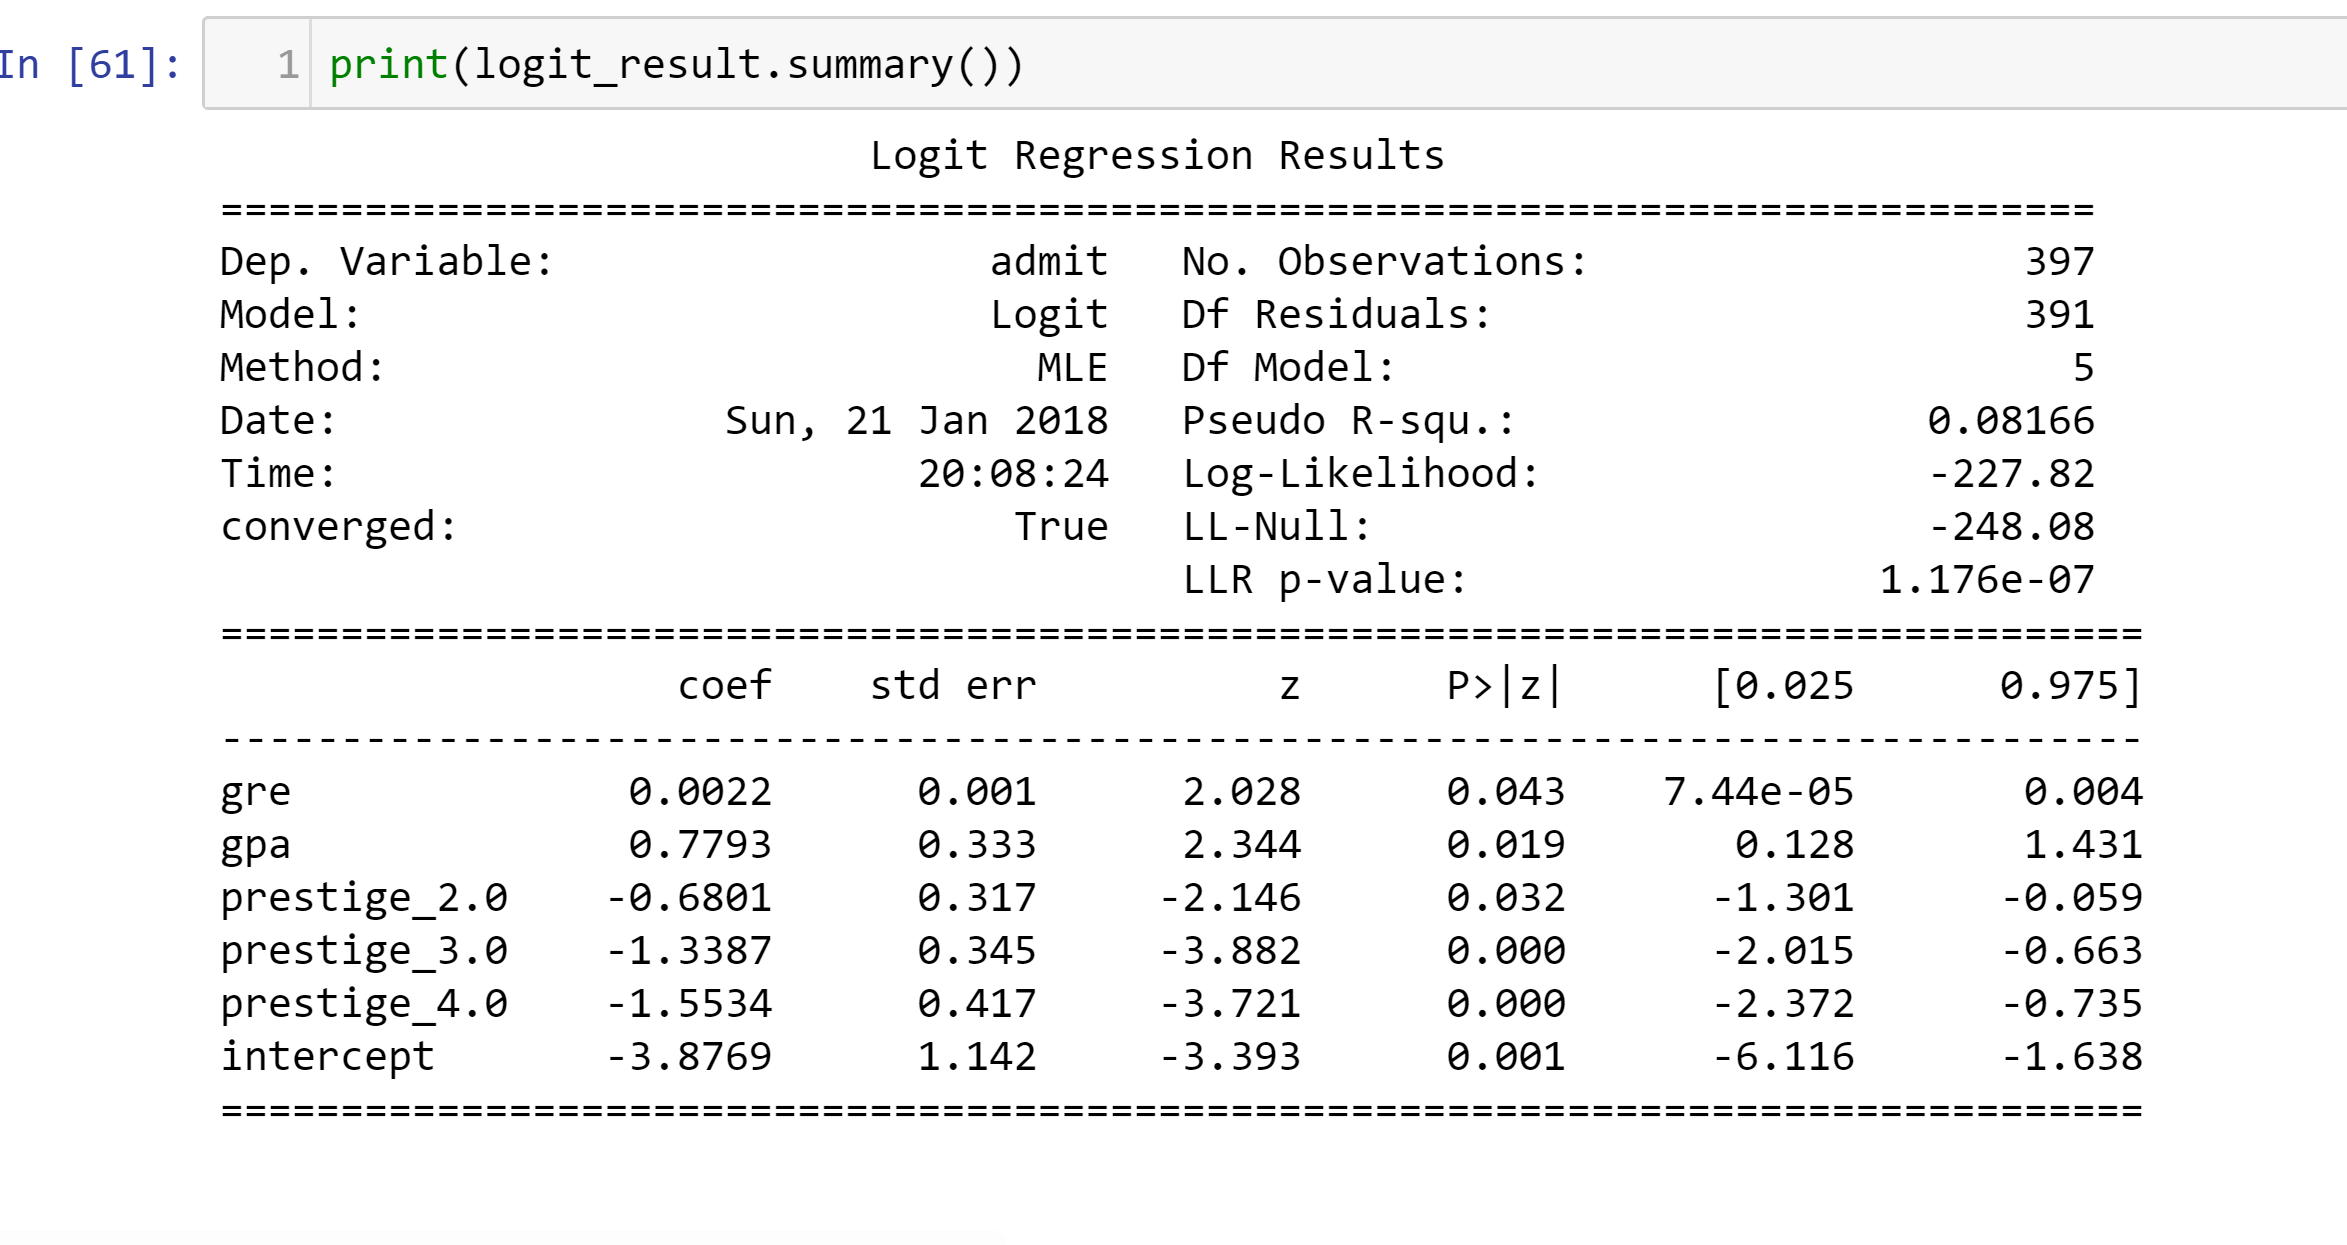

### Discussion: Write up your discussion and future steps

Answer: One can see that the logit model succeeds in estimating the multidimensional relationship between students' gre score, their gpa and the prestige ranking of their college. There might be other factors that could improve this model, for example, if there was data avaiable on any awards that the student's received, or had published research, or their work experience (e.g. how many years they had worked before applying to graduate school). One can apply other machine learning techniques such as classification and regression trees and random forests that will be covered in future classes.